<a href="https://colab.research.google.com/github/doongjinn/se-unet/blob/main/se__unet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#data 불러오기

Making numpy array from images...
0 0
1 1
2 2
3 3
4 4
5 5
6 6
7 7
8 8
9 9
10 10
11 11
12 12
13 13
14 14
15 15
16 16
17 17
18 18
19 19
20 20
21 21
22 22
23 23
24 24
25 25
26 26
27 27
28 28
29 29
30 30
31 31
32 32
33 33
34 34
35 35
36 36
37 37
38 38
39 39
40 40
41 41
42 42
43 43
44 44
45 45
46 46
47 47
48 48
49 49
50 50
51 51
52 52
53 53
54 54
55 55
56 56
57 57
58 58
59 59
60 60
61 61
62 62
63 63
64 64
65 65
66 66
67 67
68 68
69 69
70 70
71 71
72 72
73 73
74 74
75 75
76 76
77 77
78 78
79 79
80 80
81 81
82 82
83 83
84 84
85 85
86 86
87 87
88 88
89 89
90 90
91 91
92 92
93 93
94 94
95 95
96 96
97 97
98 98
99 99
100 100
101 101
102 102
103 103
104 104
105 105
106 106
107 107
108 108
109 109
110 110
111 111
112 112
113 113
114 114
115 115
116 116
117 117
118 118
119 119
120 120
121 121
122 122
123 123
124 124
125 125
126 126
127 127
128 128
129 129
130 130
131 131
132 132
133 133
134 134
135 135
136 136
137 137
138 138
139 139
140 140
141 141
142 142
143 143
144 144
145 145
146 146
147 147
14

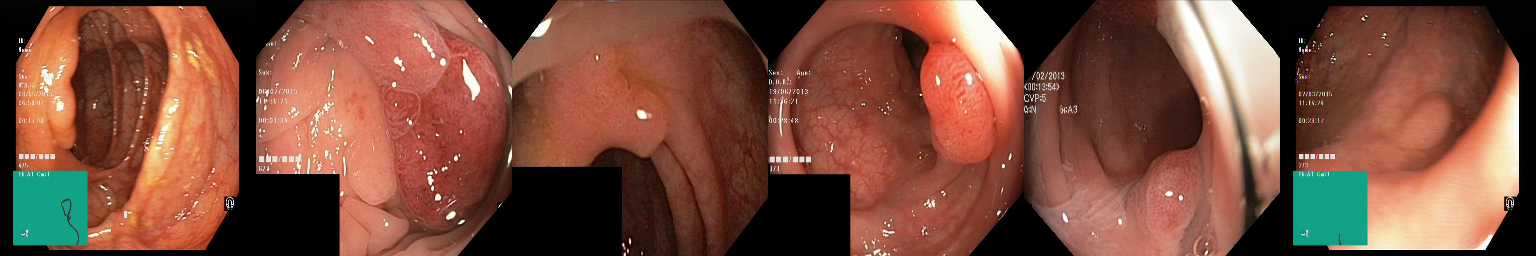

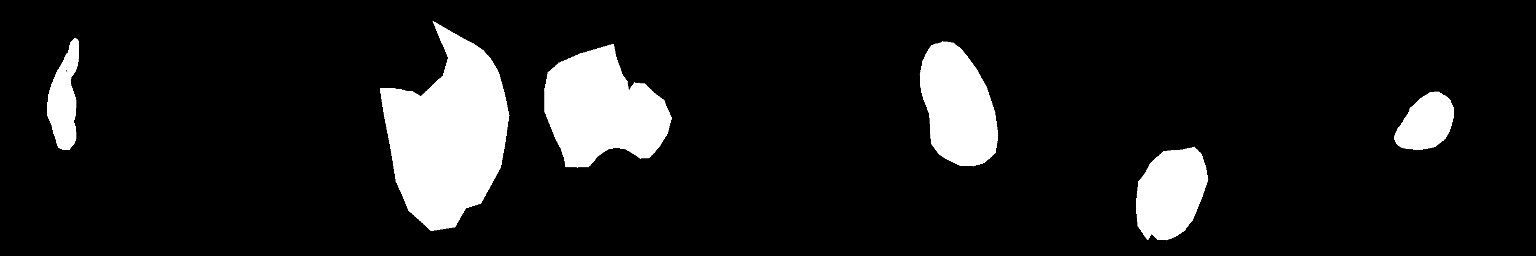

Making numpy array from images...
0 0
1 1
2 2
3 3
4 4
5 5
6 6
7 7
8 8
9 9
10 10
11 11
12 12
13 13
14 14
15 15
16 16
17 17
18 18
19 19
20 20
21 21
22 22
23 23
24 24
25 25
26 26
27 27
28 28
29 29
30 30
31 31
32 32
33 33
34 34
35 35
36 36
37 37
38 38
39 39
40 40
41 41
42 42
43 43
44 44
45 45
46 46
47 47
48 48
49 49
50 50
51 51
52 52
53 53
54 54
55 55
56 56
57 57
58 58
59 59
60 60
61 61
62 62
63 63
64 64
65 65
66 66
67 67
68 68
69 69
70 70
71 71
72 72
73 73
74 74
75 75
76 76
77 77
78 78
79 79
80 80
81 81
82 82
83 83
84 84
85 85
86 86
87 87
88 88
89 89
90 90
91 91
92 92
93 93
94 94
95 95
96 96
97 97
98 98
99 99
100 100
101 101
102 102
103 103
104 104
105 105
106 106
107 107
108 108
109 109
110 110
111 111
112 112
113 113
114 114
115 115
116 116
117 117
118 118
119 119
120 120
121 121
122 122
123 123
124 124
125 125
126 126
127 127
128 128
129 129
130 130
131 131
132 132
133 133
134 134
135 135
136 136
137 137
138 138
139 139
140 140
141 141
142 142
143 143
144 144
145 145
146 146
147 147
14

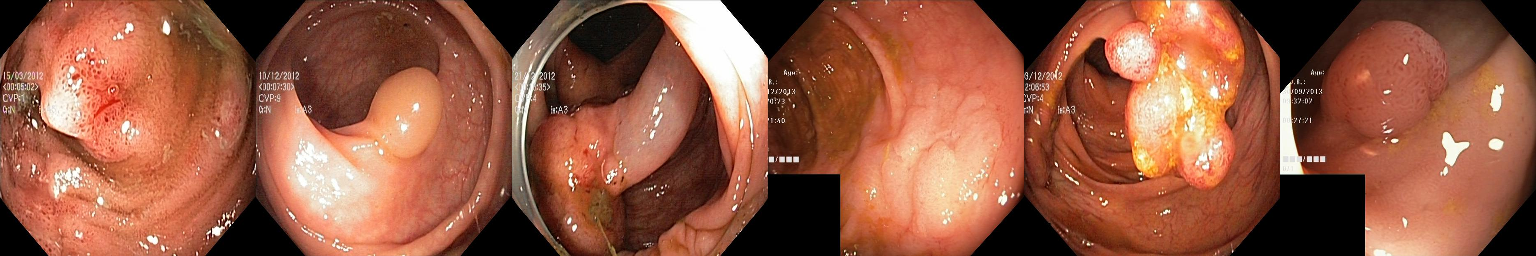

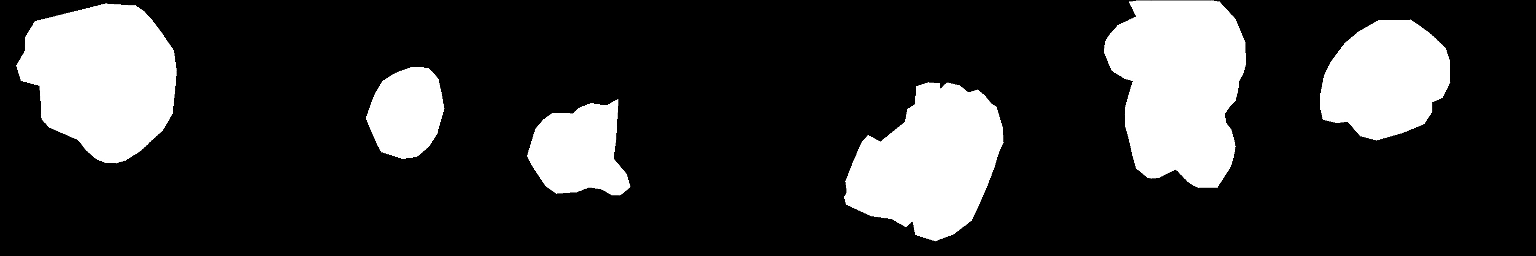

In [ ]:
from __future__ import print_function
import os
import numpy as np
import cv2

data_dir = '/content/drive/MyDrive/kvasir-seg dataset/'
#data_dir = './raw-cmr-small/'

image_rows = 256  # 저장할 영상 높이
image_cols = 256   # 저장할 영상 너비
skip = 1            # 건너뛸 영상 갯수

def read_imgs(img_path, mask_path):

    # img_path 폴더 안에 있는 모든 파일의 이름을 images 에 넣는다.
    images = os.listdir(img_path)
    total = len(images)  # 파일 개수 = 영상갯수

    mask_images = os.listdir(mask_path)
    mask_total = len(mask_images)

    imgs = np.zeros((total//skip, image_rows, image_cols,3), dtype=np.uint8)
    mask_imgs = np.zeros((mask_total//skip, image_rows, image_cols), dtype=np.uint8)

    if(total != mask_total):
        print ('Error in number of images and mask_images')
        return imgs,mask_imgs

    i = 0
    print('Making numpy array from images...')
    for image_name in images:
      if i % skip == 0 and i//skip < total//skip :  # skip 마다 영상 읽고 추가
        print (i, i//skip)

        # 영상 폴더 이름과 파일 이름을 연결하여 파일을 읽는다
        img = cv2.imread(os.path.join(img_path, image_name), cv2.IMREAD_COLOR)

        tmp = cv2.resize(img, (image_cols, image_rows), interpolation=cv2.INTER_CUBIC)
        imgs[i//skip] = tmp
      i +=1

    i = 0
    for image_name in mask_images:
      if i % skip == 0 and i//skip < total//skip :  # skip 마다 영상 읽고 추가
        print (i, i//skip)

        # 마스크 영상 폴더 이름과 파일 이름을 연결하여 파일을 읽는다
        img = cv2.imread(os.path.join(mask_path, image_name), cv2.IMREAD_GRAYSCALE)

        tmp = cv2.resize(img, (image_cols, image_rows), interpolation=cv2.INTER_CUBIC)
        mask_imgs[i//skip] = tmp
      i += 1
    print(str(total//skip) + '  Loading done.')
    return imgs, mask_imgs

import numpy as np
from google.colab.patches import cv2_imshow

def vis_img_mask(imgs, mask_imgs, wn):
    num_images = imgs.shape[0]
    size = int(num_images / 5)
    print(num_images, size)
    w = imgs.shape[2]
    h = imgs.shape[1]

    t_img = np.zeros((h, 6 * w, 3), np.uint8)  # Adjust the data type and number of channels for color images
    m_img = np.zeros((h, 6 * w), np.uint8)  # Adjust the data type and number of channels for color images
    for i in range(5):
        t_img[0:h, i * w:i * w + w] = imgs[i * size]
        m_img[0:h, i * w:i * w + w] = mask_imgs[i * size]

    t_img[0:h, 5 * w:5 * w + w] = imgs[num_images - 1]
    m_img[0:h, 5 * w:5 * w + w] = mask_imgs[num_images - 1]

    cv2_imshow(t_img)
    cv2_imshow(m_img)
def create_train_data():

    imgs, mask_imgs = read_imgs(data_dir+'train', data_dir+'train_mask')
    np.save('imgs_train.npy', imgs)
    np.save('imgs_mask_train.npy', mask_imgs)

    vis_img_mask(imgs, mask_imgs, 'train')

def create_test_data():

    imgs, mask_imgs = read_imgs(data_dir+'test', data_dir+'test_mask')
    np.save('imgs_test.npy', imgs)
    np.save('imgs_mask_test.npy', mask_imgs)

    vis_img_mask(imgs, mask_imgs, 'test')

if __name__ == '__main__':
    create_train_data()
    create_test_data()

#new3

Loading and preprocessing train data...
(800, 256, 256, 3)
Creating and compiling model...
Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 256, 256, 3)]        0         []                            
                                                                                                  
 conv1_1 (Conv2D)            (None, 256, 256, 32)         896       ['input_1[0][0]']             
                                                                                                  
 conv1_1_bn (BatchNormaliza  (None, 256, 256, 32)         128       ['conv1_1[0][0]']             
 tion)                                                                                            
                                                                                                  
 co

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


50/50 [==============================] - 138s 2s/step - loss: 0.5769 - accuracy: 0.6856
Epoch 2/300
50/50 [==============================] - 79s 2s/step - loss: 0.5336 - accuracy: 0.7568
Epoch 3/300
50/50 [==============================] - 80s 2s/step - loss: 0.4949 - accuracy: 0.7988
Epoch 4/300
50/50 [==============================] - 83s 2s/step - loss: 0.4676 - accuracy: 0.8160
Epoch 5/300
50/50 [==============================] - 83s 2s/step - loss: 0.4493 - accuracy: 0.8356
Epoch 6/300
50/50 [==============================] - 83s 2s/step - loss: 0.4315 - accuracy: 0.8449
Epoch 7/300
50/50 [==============================] - 81s 2s/step - loss: 0.4320 - accuracy: 0.8399
Epoch 8/300
50/50 [==============================] - 82s 2s/step - loss: 0.4145 - accuracy: 0.8546
Epoch 9/300
50/50 [==============================] - 83s 2s/step - loss: 0.4126 - accuracy: 0.8531
Epoch 10/300
50/50 [==============================] - 83s 2s/step - loss: 0.3877 - accuracy: 0.8631
Epoch 11/300
50/50 [

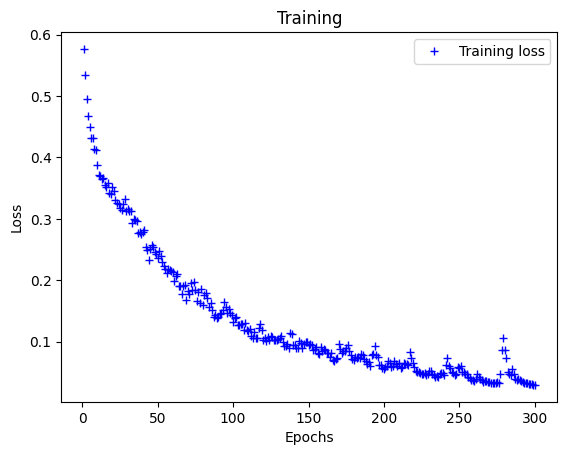

Loading and preprocessing test data...
(200, 256, 256, 3)
Loading saved weights...
Predicting masks on test data...
100/100 [==============================] - 9s 58ms/step
0 0.548303306919455
1 0.7044659427054629
2 0.7822168616145786
3 0.7666638404716497
4 0.7793513959318324
5 6.731367997380552e-05
6 6.292370575380939e-05
7 0.7038140809315765
8 0.2518388200053042
9 0.17280893783571472
10 0.002884550970714607
11 0.9239334581217852
12 0.00010213156916706176
13 8.822904518777014e-05
14 0.9408970177954785
15 0.9532709107165025
16 0.9050482799648669
17 0.9163363780856614
18 0.9161224570391526
19 0.8435911822829106
20 0.9252726180903565
21 0.9491224483366869
22 0.95131452138043
23 0.7711447423459648
24 0.9275046517298507
25 0.8732851129068223
26 0.8804243912275084
27 0.9625239862010764
28 0.9588249061847544
29 0.9583156728195059
30 0.6262570546496721
31 0.9394557137604848
32 0.9790754265283739
33 0.9153365248007617
34 0.8623228225264168
35 0.9349790046468227
36 0.9523440246681296
37 0.720449

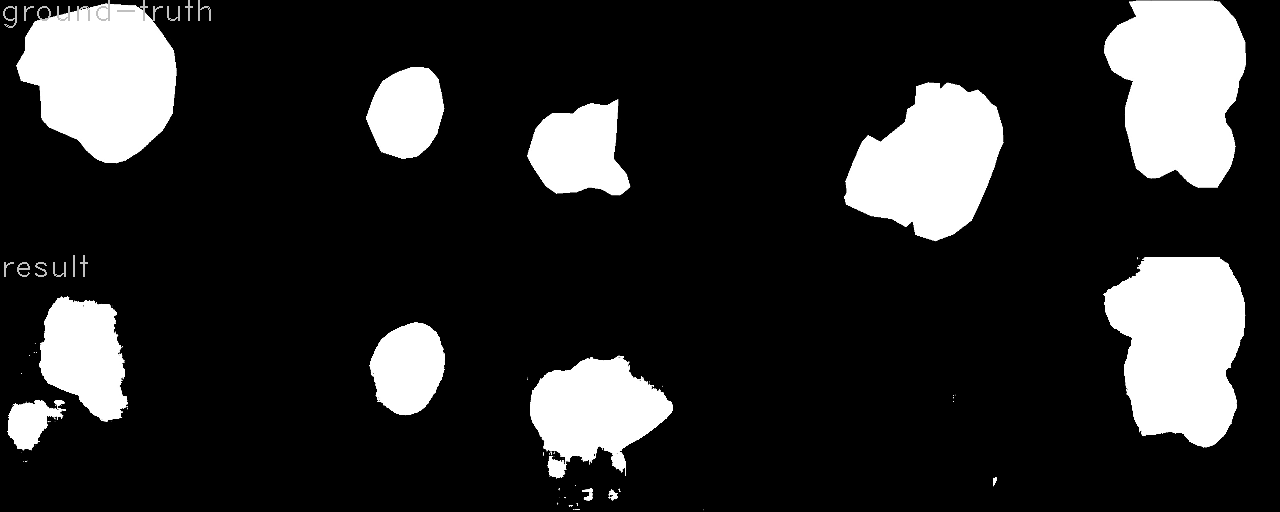

In [ ]:
from __future__ import print_function

import cv2
import numpy as np
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, concatenate, Dropout, Conv2D, Conv3D
from tensorflow.keras.layers import MaxPooling2D, MaxPooling3D, Conv2DTranspose, UpSampling2D
from tensorflow.keras.layers import BatchNormalization, Activation, Lambda, GlobalAveragePooling2D
from tensorflow.keras.layers import Reshape, Dense, multiply, Add, Concatenate

from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, LearningRateScheduler
from tensorflow.keras import backend as K

from tensorflow.keras import models

from tensorflow.keras import callbacks
import cv2
import time
import os
import h5py

from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, concatenate, Conv2D, MaxPooling2D, Conv2DTranspose
from tensorflow.keras.layers import Activation, add, multiply, Lambda
from tensorflow.keras.layers import AveragePooling2D, average, UpSampling2D, Dropout
from tensorflow.keras.optimizers import Adam, SGD, RMSprop
from tensorflow.keras.initializers import glorot_normal, random_normal, random_uniform
from tensorflow.keras.callbacks import ModelCheckpoint, TensorBoard, EarlyStopping

from tensorflow.keras import backend as K
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.models import load_model

import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc, precision_recall_curve # roc curve tools
from sklearn.model_selection import train_test_split
K.set_image_data_format('channels_last')  # TF dimension ordering in this code
kinit = 'glorot_normal'

img_rows = 256  # u-net 입력영상 높이
img_cols = 256   # u-net 입력영상 너비
ch = 3

smooth = 1.

#data_path = 'drive/My Drive/raw-cmr-small/'
data_path = './'

import tensorflow as tf
config = tf.compat.v1.ConfigProto()
config.gpu_options.allow_growth = True
session = tf.compat.v1.Session(config=config)

def load_train_data():
    imgs_train = np.load(data_path+'imgs_train.npy')
    imgs_mask_train = np.load(data_path+'imgs_mask_train.npy')
    return imgs_train, imgs_mask_train

def load_test_data():
    imgs_test = np.load(data_path+'imgs_test.npy')
    imgs_mask_test = np.load(data_path+'imgs_mask_test.npy')
    return imgs_test, imgs_mask_test

def dice_coef(y_true, y_pred):
    y_true_f = K.flatten(y_true)
    y_pred_f = K.flatten(y_pred)
    intersection = K.sum(y_true_f * y_pred_f)
    return (2. * intersection + smooth) / (K.sum(y_true_f) + K.sum(y_pred_f) + smooth)

def dice_coef_loss(y_true, y_pred):
    return -dice_coef(y_true, y_pred)

def dice_metric_loss(ground_truth, predictions, smooth=1e-6):
    ground_truth = K.cast(ground_truth, tf.float32)
    predictions = K.cast(predictions, tf.float32)
    ground_truth = K.flatten(ground_truth)
    predictions = K.flatten(predictions)
    intersection = K.sum(predictions * ground_truth)
    union = K.sum(predictions) + K.sum(ground_truth)

    dice = (2. * intersection + smooth) / (union + smooth)

    return 1 - dice
def expend_as(tensor, rep,name):
   my_repeat = Lambda(lambda x, repnum: K.repeat_elements(x, repnum, axis=3), arguments={'repnum': rep},  name='psi_up'+name)(tensor)
   return my_repeat

def AttnGatingBlock(x, g, inter_shape, name):
    ''' take g which is the spatially smaller signal, do a conv to get the same
    number of feature channels as x (bigger spatially)
    do a conv on x to also get same geature channels (theta_x)
    then, upsample g to be same size as x
    add x and g (concat_xg)
    relu, 1x1 conv, then sigmoid then upsample the final - this gives us attn coefficients'''

    shape_x = K.int_shape(x)  # 32
    shape_g = K.int_shape(g)  # 16

    theta_x = Conv2D(inter_shape, (2, 2), strides=(2, 2), padding='same', name='xl'+name)(x)  # 16
    shape_theta_x = K.int_shape(theta_x)

    phi_g = Conv2D(inter_shape, (1, 1), padding='same')(g)
    upsample_g = Conv2DTranspose(inter_shape, (3, 3),strides=(shape_theta_x[1] // shape_g[1], shape_theta_x[2] // shape_g[2]),padding='same', name='g_up'+name)(phi_g)  # 16

    concat_xg = add([upsample_g, theta_x])
    act_xg = Activation('relu')(concat_xg)
    psi = Conv2D(1, (1, 1), padding='same', name='psi'+name)(act_xg)
    sigmoid_xg = Activation('sigmoid')(psi)
    shape_sigmoid = K.int_shape(sigmoid_xg)
    upsample_psi = UpSampling2D(size=(shape_x[1] // shape_sigmoid[1], shape_x[2] // shape_sigmoid[2]))(sigmoid_xg)  # 32

    upsample_psi = expend_as(upsample_psi, shape_x[3],  name)
    y = multiply([upsample_psi, x], name='q_attn'+name)

    result = Conv2D(shape_x[3], (1, 1), padding='same',name='q_attn_conv'+name)(y)
    result_bn = BatchNormalization(name='q_attn_bn'+name)(result)
    return result_bn

def squeeze_excite_block(input, ratio=16):
    init = input
    channel_axis = 1 if K.image_data_format() == "channels_first" else -1
    filters = init.shape[channel_axis]
    se_shape = (1, 1, filters)

    se = GlobalAveragePooling2D()(init)
    se = Reshape(se_shape)(se)
    se = Dense(filters // ratio, activation='relu', kernel_initializer='he_normal', use_bias=False)(se)
    se = Dense(filters, activation='sigmoid', kernel_initializer='he_normal', use_bias=False)(se)

    if K.image_data_format() == 'channels_first':
        se = Permute((3, 1, 2))(se)

    x = multiply([init, se])
    return x

def UnetConv2D(input, outdim, is_batchnorm, name):
   x = Conv2D(outdim, (3, 3), strides=(1, 1), kernel_initializer=kinit, padding="same", name=name+'_1')(input)
   if is_batchnorm:
      x =BatchNormalization(name=name + '_1_bn')(x)
   x = Activation('relu',name=name + '_1_act')(x)

   x = Conv2D(outdim, (3, 3), strides=(1, 1), kernel_initializer=kinit, padding="same", name=name+'_2')(x)
   if is_batchnorm:
      x = BatchNormalization(name=name + '_2_bn')(x)
   x = Activation('relu', name=name + '_2_act')(x)
   return x

def BN_block(filter_num, input):
    x = Conv2D(filter_num, 3, padding='same', kernel_initializer='he_normal')(input)
    x = BatchNormalization()(x)
    x1 = Activation('relu')(x)
    x = Conv2D(filter_num, 3, padding='same', kernel_initializer='he_normal')(x1)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    return x

def UnetGatingSignal(input, is_batchnorm, name):
    ''' this is simply 1x1 convolution, bn, activation '''
    shape = K.int_shape(input)
    x = Conv2D(shape[3] * 1, (1, 1), strides=(1, 1), padding="same",  kernel_initializer=kinit, name=name + '_conv')(input)
    if is_batchnorm:
        x = BatchNormalization(name=name + '_bn')(x)
    x = Activation('relu', name = name + '_act')(x)
    return x

# plain old attention gates in u-net, NO multi-input, NO deep supervision
def attn_unet():

    inputs = Input((img_rows, img_cols, ch))
    conv1 = UnetConv2D(inputs, 32, is_batchnorm=True, name='conv1')
    conv1 = squeeze_excite_block(conv1)
    conv1 = BN_block(32, conv1)
    pool1 = MaxPooling2D(pool_size=(2, 2))(conv1)

    conv2 = UnetConv2D(pool1, 32, is_batchnorm=True, name='conv2')
    conv2 = squeeze_excite_block(conv2)
    conv2 = BN_block(32, conv2)
    pool2 = MaxPooling2D(pool_size=(2, 2))(conv2)

    conv3 = UnetConv2D(pool2, 64, is_batchnorm=True, name='conv3')
    #conv3 = Dropout(0.2,name='drop_conv3')(conv3)
    conv3 = squeeze_excite_block(conv3)
    conv3 = BN_block(64, conv3)
    pool3 = MaxPooling2D(pool_size=(2, 2))(conv3)

    conv4 = UnetConv2D(pool3, 64, is_batchnorm=True, name='conv4')
    conv4 = squeeze_excite_block(conv4)
    #conv4 = Dropout(0.2, name='drop_conv4')(conv4)
    conv4 = BN_block(64, conv4)
    pool4 = MaxPooling2D(pool_size=(2, 2))(conv4)

    center = UnetConv2D(pool4, 128, is_batchnorm=True, name='center')

    g1 = UnetGatingSignal(center, is_batchnorm=True, name='g1')
    attn1 = AttnGatingBlock(conv4, g1, 128, '_1')
    new1 = conv4 + attn1
    new1 = BN_block(32,new1)
    up1 = concatenate([Conv2DTranspose(32, (3,3), strides=(2,2), padding='same', activation='relu', kernel_initializer=kinit)(center), new1], name='up1')

    g2 = UnetGatingSignal(up1, is_batchnorm=True, name='g2')
    attn2 = AttnGatingBlock(conv3, g2, 128, '_2')
    new2 = conv3 + attn2
    new2 = BN_block(64,new2)
    up2 = concatenate([Conv2DTranspose(64, (3,3), strides=(2,2), padding='same', activation='relu', kernel_initializer=kinit)(up1), new2], name='up2')

    g3 = UnetGatingSignal(up2, is_batchnorm=True, name='g3')
    attn3 = AttnGatingBlock(conv2, g3, 128, '_3')
    new3 = conv2 + attn3
    new3 = BN_block(128,new3)
    up3 = concatenate([Conv2DTranspose(32, (3,3), strides=(2,2), padding='same', activation='relu', kernel_initializer=kinit)(up2), new3], name='up3')

    g4 = UnetGatingSignal(up3, is_batchnorm=True, name='g4')
    attn4 = AttnGatingBlock(conv1, g4, 128, '_4')
    new4 = conv1 + attn4
    new4 = BN_block(256,new4)
    up4 = concatenate([Conv2DTranspose(32, (3,3), strides=(2,2), padding='same', activation='relu', kernel_initializer=kinit)(up3), new4], name='up4')
    out = Conv2D(1, (1, 1), activation='sigmoid',  kernel_initializer=kinit, name='final')(up4)

    model = Model(inputs=[inputs], outputs=[out])
    model.compile(optimizer="Adam",loss=dice_metric_loss, metrics=['accuracy'])
    return model

def preprocess(imgs):
    print(imgs.shape)
    imgs_p = np.ndarray((imgs.shape[0], img_rows, img_cols, ch), dtype=np.uint8)
    for i in range(imgs.shape[0]):
        tmp1 = cv2.resize(imgs[i], (img_cols, img_rows), interpolation=cv2.INTER_CUBIC)
        imgs_p[i,:,:,0] = tmp1[:,:,0]  # tmp1.shape(256,256,3)
        imgs_p[i,:,:,1] = tmp1[:,:,1]
        imgs_p[i,:,:,2] = tmp1[:,:,2]
    return imgs_p
# def preprocess(imgs):
#     imgs_p = np.ndarray((imgs.shape[0], img_rows, img_cols, ch), dtype=np.uint8)
#     for i in range(imgs.shape[0]):
#         tmp1 = cv2.resize(imgs[i], (img_cols, img_rows), interpolation=cv2.INTER_CUBIC)
#         imgs_p[i,:,:,0] = tmp1
#         imgs_p[i,:,:,1] = tmp1
#         imgs_p[i,:,:,2] = tmp1
#     return imgs_p
def preprocess_mask(imgs):
    imgs_p = np.ndarray((imgs.shape[0], img_rows, img_cols, 1), dtype=np.uint8)
    for i in range(imgs.shape[0]):
        tmp = cv2.resize(imgs[i], (img_cols, img_rows), interpolation=cv2.INTER_CUBIC)
        imgs_p[i,:,:,0] = tmp
    return imgs_p

def train_and_predict():
    import numpy as np
    from google.colab.patches import cv2_imshow

    np.random.seed(1230)
    print('Loading and preprocessing train data...')
    imgs_train, imgs_mask_train = load_train_data()

    imgs_train = preprocess(imgs_train)
    imgs_mask_train = preprocess_mask(imgs_mask_train)

    t_img = imgs_train[0,:,:,0]
    t_img = imgs_mask_train[0,:,:,0]

    imgs_train = imgs_train.astype('float32') / 255
    imgs_mask_train = imgs_mask_train.astype('float32') / 255

    print('Creating and compiling model...')

    model = attn_unet()
    model.summary()

    model_checkpoint = ModelCheckpoint('unet.hdf5', monitor='loss', save_best_only=True)

    print('Fitting model...')
    epoch = 300
    history = model.fit(imgs_train, imgs_mask_train, batch_size=16, epochs=epoch,
			verbose=1, shuffle=True,callbacks=[model_checkpoint])

    history_dict = history.history
    print (history_dict)
    loss_values = history_dict['loss']

    epochs = range(1, epoch + 1)

    from matplotlib import pyplot as plt
    plt.plot(epochs, loss_values, 'b+', label='Training loss')
    plt.title('Training')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.show()

    print('Loading and preprocessing test data...')
    imgs_test, imags_mask_test = load_test_data()
    imgs_test = preprocess(imgs_test)
    imags_mask_test = preprocess_mask(imags_mask_test)

    imgs_test = imgs_test.astype('float32') / 255
    imags_mask_test = imags_mask_test.astype('float32') / 255

    print('Loading saved weights...')
    model.load_weights('unet.hdf5')

    import numpy as np

    print('Predicting masks on test data...')
    imgs_test_pred = model.predict(imgs_test, batch_size=2, verbose=1)
    np.save('imgs_test_pred.npy', imgs_test_pred)

    smooth = 1.
    dice_coeff = 0.0
    for i in range(imgs_test.shape[0]):
        y_true_f = imags_mask_test[i,:,:,0]
        y_pred_f = imgs_test_pred[i,:,:,0]

        intersection = np.sum(y_true_f * y_pred_f)
        dice = (2. * intersection + smooth) / (np.sum(y_true_f) + np.sum(y_pred_f) + smooth)
        dice_coeff = dice_coeff + dice
        print (i, dice)
    dice_coeff = dice_coeff / imgs_test.shape[0]
    print (dice_coeff)

    # cv2.moveWindow('mask', 20,0);
    # cv2.waitKey(0)
    size = imags_mask_test.shape[0]//5
    w = imags_mask_test.shape[2]
    h = imags_mask_test.shape[1]
    t_img = np.zeros((2*h,5*w), np.uint8)
    for i in range (5):
        t_img[0:h,i*w:i*w+w] = 255*imags_mask_test[i*size][:,:,0]
        t_img[h:h+h,i*w:i*w+w] = 255*imgs_test_pred[i*size][:,:,0]

    cv2.putText(t_img, 'ground-truth', (0,20), 2, 1, (192, 192, 192))
    cv2.putText(t_img, 'result', (0,256+20), 2, 1, (192, 192, 192))
    cv2_imshow(t_img)

if __name__ == '__main__':
    train_and_predict()
